# SMOTE

In [9]:
import pandas as pd

df_train = pd.read_csv('../data/dataframe_train.csv')
df_test = pd.read_csv('../data/dataframe_test.csv')

In [10]:
df_train.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,...,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Jour,Mois,Date
0,A013010004908126703060931,78643044,0,20.00,1,0,0,0,551.0,0.000000,...,1,4.000000,4.0,4.0,20.00,0.00,27134,1,2,2017-02-01
1,A013011306908024927155000,78643045,0,20.00,1,0,0,0,551.0,0.000000,...,2,1.797685,4.0,4.0,28.61,8.61,27817,1,2,2017-02-01
2,A013010002908283134592527,78643046,0,57.64,1,0,0,0,549.0,0.000000,...,1,4.000000,4.0,4.0,57.64,0.00,28058,1,2,2017-02-01
3,A011010002908105209831316,78643047,0,54.29,0,1,1,1,267.0,0.000000,...,1,4.000000,4.0,4.0,54.29,0.00,28128,1,2,2017-02-01
4,A013010041908000125652029,78643048,0,26.90,1,0,0,0,549.0,0.003769,...,1,1.997106,4.0,4.0,59.15,32.25,29607,1,2,2017-02-01


In [11]:
from imblearn.over_sampling import SMOTE

# Diviser le DataFrame en X (caractéristiques) et y (étiquettes)
X = df_train.drop(['ZIBZIN','IDAvisAutorisationCheque','FlagImpaye','Date'], axis=1)
y = df_train['FlagImpaye']

df_test = df_test.drop(['ZIBZIN','IDAvisAutorisationCheque','Date'], axis=1)

# SMOTE 5 %

In [12]:
smote = SMOTE(sampling_strategy=0.5, random_state=42, k_neighbors=5) # 5 %
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

# Afficher les informations après le SMOTE
print("Nombre d'échantillons avant SMOTE:", len(X))
print("Nombre d'échantillons après SMOTE:", len(X_train_resampled))

# Concatenate X_train_resampled and y_train_resampled
df_train_5_percent = pd.concat([X_train_resampled, y_train_resampled], axis=1)

Nombre d'échantillons avant SMOTE: 3899362
Nombre d'échantillons après SMOTE: 5813910


# SMOTE 35 %

In [13]:
smote = SMOTE(sampling_strategy=0.5, random_state=42, k_neighbors=5) # 50 %
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

# Afficher les informations après le SMOTE
print("Nombre d'échantillons avant SMOTE:", len(X))
print("Nombre d'échantillons après SMOTE:", len(X_train_resampled))

# Concatenate X_train_resampled and y_train_resampled
df_train_50_percent = pd.concat([X_train_resampled, y_train_resampled], axis=1)

Nombre d'échantillons avant SMOTE: 3899362
Nombre d'échantillons après SMOTE: 5813910


In [14]:
df_train_50_percent.head()

,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,...,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Jour,Mois,FlagImpaye
0,20.00,1,0,0,0,551.0,0.000000,0.000000,0.000000,37.186668,...,1,4.000000,4.0,4.0,20.00,0.00,27134,1,2,0
1,20.00,1,0,0,0,551.0,0.000000,0.000000,0.000000,48.844716,...,2,1.797685,4.0,4.0,28.61,8.61,27817,1,2,0
2,57.64,1,0,0,0,549.0,0.000000,0.000000,0.000000,73.118280,...,1,4.000000,4.0,4.0,57.64,0.00,28058,1,2,0
3,54.29,0,1,1,1,267.0,0.000000,0.000000,0.000000,110.056926,...,1,4.000000,4.0,4.0,54.29,0.00,28128,1,2,0
4,26.90,1,0,0,0,549.0,0.003769,8.586333,0.001192,45.368313,...,1,1.997106,4.0,4.0,59.15,32.25,29607,1,2,0


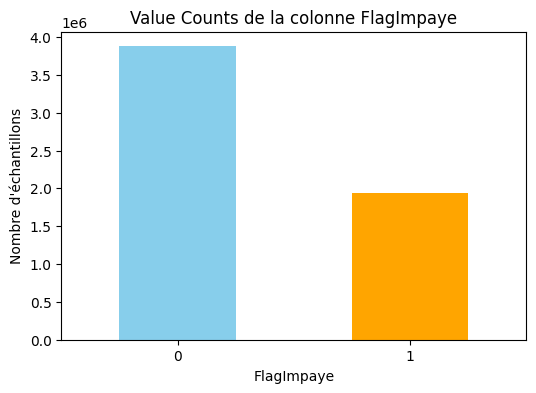

FlagImpaye
0    3875940
1    1937970
Name: count, dtype: int64


In [15]:
from matplotlib import pyplot as plt

# Créer un diagramme à barres
plt.figure(figsize=(6, 4))
df_train_50_percent['FlagImpaye'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Value Counts de la colonne FlagImpaye')
plt.xlabel('FlagImpaye')
plt.ylabel('Nombre d\'échantillons')
plt.xticks(rotation=0)
plt.show()
print(df_train_50_percent['FlagImpaye'].value_counts())

In [16]:
df_train_5_percent.to_csv('../data/smote/dataframe_train_5_percent.csv',index=False)
df_train_50_percent.to_csv('../data/smote/dataframe_train_50_percent.csv',index=False)

df_test.to_csv('../data/smote/dataframe_test.csv',index=False)